# Bayesian Networks

In [ ]:
# Define Bayesian Networks
import networkx as nx
from itertools import product
import matplotlib.pyplot as plt
class BayesNet(nx.DiGraph):
    def __mod__(self, node): return self.nodes[node]['V']
    def __mul__(self, other): n, v = other; self.add_node(n, V=tuple(v), CPT=None); return self
    def __truediv__(self, other): 
        for o in other:  self.remove_node(o); return self
    def __add__(self, other): self.add_edge(*other); return self
    def __sub__(self, other): self.remove_edge(*other); return self
    def __call__(self, node, evi=None): return self.nodes[node]['CPT'] if evi is None else self.nodes[node]['CPT'][evi]
    def __invert__(self,): 
        for n in self.nodes:
            pdn = self.predecessors(n)
            vals = (self)%(n) # set of possible vals
            pvals=[(self)%(p) for p in pdn] # list of sets
            self.nodes[n]['CPT'] = {combo:{k:0.0 for k in vals} for combo in product(*pvals)}
            self.nodes[n]['P'] = tuple(pdn)
        return self
    def check(self, delta=1e-15):
        for n in self.nodes:
            print(f'Node [{n}]') 
            cpt = self.nodes[n]['CPT'] 
            for k, v in cpt.items():
                sumprobs = sum(list(v.values()))
                print(f'\tEvi [{k}], probs={v}, {sumprobs=}, {"✅" if abs(1 - sumprobs) < delta else "⛔"}')
    def plot(self, pos=None, figsize=(5,5), node_color='white', edge_color='black', node_size=500, font_size=10, arrow_size=10, seed=None):
        if not pos: pos = nx.spring_layout(self, seed=seed)
        plt.figure(figsize=figsize)
        nx.draw(self, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=font_size, font_weight="bold", arrowsize=arrow_size, edgecolors=edge_color,)
        plt.title(f"Nodes={len(self.nodes)} Edges={len(self.edges)}")
        plt.axis("off")
        plt.show()


### [B.1] Holmes Scenario

Consider the Holme’s scenario with binary RVs and their joint distribution given in the table below:

![BN](http://172.30.1.73:2103/p/BNh.png)


Tasks:

* [a] Create a Bayesian Network as shown in the figure and assign the CPT values.

* [b] Find the probability that:
    * The alarm has sounded,
    * Neither a burglary nor an earthquake has occured,
    * Both Watson and Gibbon Call and say they hear the alarm, 
    * There is no radio report of an earthquake.

* [c] Find the probability that:
    * The alarm has not sounded,
    * Neither a burglary nor an earthquake has occured,
    * Neither of Watson and Gibbon is calling,
    * There is no radio report of an earthquake.


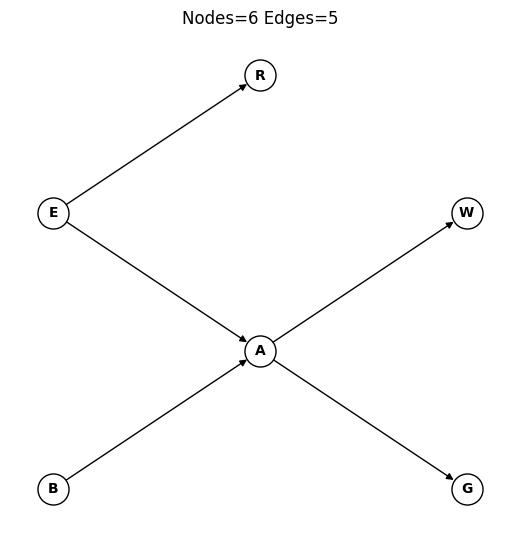

Node [A]
	Evi [('e0', 'b0')], probs={'a0': 0.99, 'a1': 0.01}, sumprobs=1.0, ✅
	Evi [('e0', 'b1')], probs={'a0': 0.050000000000000044, 'a1': 0.95}, sumprobs=1.0, ✅
	Evi [('e1', 'b0')], probs={'a0': 0.8, 'a1': 0.2}, sumprobs=1.0, ✅
	Evi [('e1', 'b1')], probs={'a0': 0.040000000000000036, 'a1': 0.96}, sumprobs=1.0, ✅
Node [B]
	Evi [()], probs={'b0': 0.9999, 'b1': 0.0001}, sumprobs=1.0, ✅
Node [E]
	Evi [()], probs={'e0': 0.9997, 'e1': 0.0003}, sumprobs=1.0, ✅
Node [G]
	Evi [('a0',)], probs={'g0': 0.96, 'g1': 0.04}, sumprobs=1.0, ✅
	Evi [('a1',)], probs={'g0': 0.6, 'g1': 0.4}, sumprobs=1.0, ✅
Node [R]
	Evi [('e0',)], probs={'r0': 0.9998, 'r1': 0.0002}, sumprobs=1.0, ✅
	Evi [('e1',)], probs={'r0': 0.09999999999999998, 'r1': 0.9}, sumprobs=1.0, ✅
Node [W]
	Evi [('a0',)], probs={'w0': 0.6, 'w1': 0.4}, sumprobs=1.0, ✅
	Evi [('a1',)], probs={'w0': 0.19999999999999996, 'w1': 0.8}, sumprobs=1.0, ✅
[b] Probability = 0.00319808
[c] Probability = 0.56989792


In [7]:
#[B.1] Holmes Scenario
import networkx as nx
from itertools import product
import matplotlib.pyplot as plt

class BayesNet(nx.DiGraph):
    def __mod__(self, node):
        return self.nodes[node]['V']
    def __mul__(self, other):
        n, v = other
        self.add_node(n, V=tuple(v), CPT=None)
        return self
    def __truediv__(self, other):
        for o in other:
            self.remove_node(o)
        return self
    def __add__(self, other):
        self.add_edge(*other)
        return self
    def __sub__(self, other):
        self.remove_edge(*other)
        return self
    def __call__(self, node, evi=None):
        if evi is None:
            return self.nodes[node]['CPT']
        else:
            return self.nodes[node]['CPT'][evi]
    def __invert__(self,):
        for n in self.nodes:
            pdn = list(self.predecessors(n))
            vals = self % n  # set of possible vals
            pvals = [self % p for p in pdn]  # list of sets
            combos = list(product(*pvals)) if pdn else [()]
            self.nodes[n]['CPT'] = {combo: {k: 0.0 for k in vals} for combo in combos}
            self.nodes[n]['P'] = tuple(pdn)
        return self
    def check(self, delta=1e-15):
        for n in self.nodes:
            print(f'Node [{n}]')
            cpt = self.nodes[n]['CPT']
            for k, v in cpt.items():
                sumprobs = sum(list(v.values()))
                print(f'\tEvi [{k}], probs={v}, sumprobs={sumprobs}, {"✅" if abs(1 - sumprobs) < delta else "⛔"}')
    def plot(self, pos=None, figsize=(5, 5), node_color='white', edge_color='black', node_size=500, font_size=10, arrow_size=10, seed=None):
        if pos is None:
            pos = nx.spring_layout(self, seed=seed)
        plt.figure(figsize=figsize)
        nx.draw(self, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=font_size, font_weight="bold", arrowsize=arrow_size, edgecolors=edge_color)
        plt.title(f"Nodes={len(self.nodes)} Edges={len(self.edges)}")
        plt.axis("off")
        plt.show()

# Instantiate Bayesian Network
BN = BayesNet()

# Add nodes (binary variables)
BN *= ['A', ("a0", "a1")]  # Alarm
BN *= ['B', ("b0", "b1")]  # Burglary
BN *= ['E', ("e0", "e1")]  # Earthquake
BN *= ['G', ("g0", "g1")]  # Gibbon calls
BN *= ['R', ("r0", "r1")]  # Radio report
BN *= ['W', ("w0", "w1")]  # Watson calls

# Add edges as per the structure
BN += ('E', 'A')
BN += ('E', 'R')
BN += ('B', 'A')
BN += ('A', 'W')
BN += ('A', 'G')

# Plot the network
BN.plot(
    pos={
        'A': (0, 0),
        'B': (-1, -1),
        'E': (-1, 1),
        'G': (1, -1),
        'R': (0, 2),
        'W': (1, 1)
    }
)

# Initialize CPTs
BN = ~BN

# Assign probabilities

# P(E)
BN('E')[()][ 'e1' ] = 0.0003
BN('E')[()][ 'e0' ] = 1 - BN('E')[()][ 'e1' ]

# P(B)
BN('B')[()][ 'b1' ] = 0.0001
BN('B')[()][ 'b0' ] = 1 - BN('B')[()][ 'b1' ]

# P(R | E)
BN('R')[('e0',)]['r1'] = 0.0002
BN('R')[('e0',)]['r0'] = 1 - BN('R')[('e0',)]['r1']
BN('R')[('e1',)]['r1'] = 0.9
BN('R')[('e1',)]['r0'] = 1 - BN('R')[('e1',)]['r1']

# Get parent order for A (should be ('E', 'B'))
parents_A = BN.nodes['A']['P']  # ('E', 'B')

# P(A | E, B)
BN('A')[('e0', 'b0')]['a1'] = 0.01
BN('A')[('e0', 'b0')]['a0'] = 1 - BN('A')[('e0', 'b0')]['a1']
BN('A')[('e1', 'b0')]['a1'] = 0.2
BN('A')[('e1', 'b0')]['a0'] = 1 - BN('A')[('e1', 'b0')]['a1']
BN('A')[('e0', 'b1')]['a1'] = 0.95
BN('A')[('e0', 'b1')]['a0'] = 1 - BN('A')[('e0', 'b1')]['a1']
BN('A')[('e1', 'b1')]['a1'] = 0.96
BN('A')[('e1', 'b1')]['a0'] = 1 - BN('A')[('e1', 'b1')]['a1']

# P(W | A)
BN('W')[('a0',)]['w1'] = 0.4
BN('W')[('a0',)]['w0'] = 1 - BN('W')[('a0',)]['w1']
BN('W')[('a1',)]['w1'] = 0.8
BN('W')[('a1',)]['w0'] = 1 - BN('W')[('a1',)]['w1']

# P(G | A)
BN('G')[('a0',)]['g1'] = 0.04
BN('G')[('a0',)]['g0'] = 1 - BN('G')[('a0',)]['g1']
BN('G')[('a1',)]['g1'] = 0.4
BN('G')[('a1',)]['g0'] = 1 - BN('G')[('a1',)]['g1']

# Check CPTs
BN.check()

# Joint probability for a full assignment
def joint_prob(bn, assignment):
    p = 1.0
    for node in bn.nodes:
        parents = bn.nodes[node]['P']
        if parents:
            parent_vals = tuple(assignment[p] for p in parents)
        else:
            parent_vals = ()
        node_val = assignment[node]
        try:
            prob = bn(node, parent_vals)[node_val]
        except KeyError:
            print(f"KeyError: node={node}, parent_vals={parent_vals}, node_val={node_val}")
            print(f"Available CPT keys for node {node}: {list(bn(node).keys())}")
            raise
        p *= prob
    return p

# [b] Probability: A=a1, B=b0, E=e0, W=w1, G=g1, R=r0
assignment_b = {
    'A': 'a1',
    'B': 'b0',
    'E': 'e0',
    'W': 'w1',
    'G': 'g1',
    'R': 'r0'
}
P_b = joint_prob(BN, assignment_b)
print(f"[b] Probability = {P_b:.8f}")

# [c] Probability: A=a0, B=b0, E=e0, W=w0, G=g0, R=r0
assignment_c = {
    'A': 'a0',
    'B': 'b0',
    'E': 'e0',
    'W': 'w0',
    'G': 'g0',
    'R': 'r0'
}
P_c = joint_prob(BN, assignment_c)
print(f"[c] Probability = {P_c:.8f}")


### [B.2] Review Classification

We have a vocabulary of 10 words 

$V=\{I,loved,the,movie,hated,a,great,poor,acting,good\}$

We are given a labelled dataset of movie reviews containing 5 documents as follows:

* $d_1$: I loved the movie 	(**+**)
* $d_2$: I hated the movie 	(**-**)
* $d_3$: a great movie good movie 	(**+**)
* $d_4$: poor acting 	(**-**)
* $d_5$: great acting a good movie 	(**+**)

Tasks: 

* [a] Build a bayesian network under the assumption that the occurance a word in a document depends only upon the label. Assign CPT to each node. 

* [b] Find the probabilities that the sentence "*I hated the poor acting*" belongs (+) and (-) class.


In [45]:
# [B.2] Review Classification
import numpy as np
import pandas as pd

# (a) Build a Bayesian network under the assumption that the occurrence of a word depends only on the label.
# Vocabulary and dataset
vocab = ['I','loved','the','movie','hated','a','great','poor','acting','good']
docs = [
    (['I','loved','the','movie'], '+'),
    (['I','hated','the','movie'], '-'),
    (['a','great','movie','good','movie'], '+'),
    (['poor','acting'], '-'),
    (['great','acting','a','good','movie'], '+')
    ]

# Count word occurrences for each class
from collections import Counter,defaultdict

word_counts = {'+': Counter(), '-': Counter()}
label_counts = {'+': 0, '-': 0}
for words, label in docs:
    label_counts[label] += 1
    word_counts[label].update(words)

# Laplace smoothing
def word_prob(word, label, alpha=1):
    return (word_counts[label][word] + alpha) / (sum(word_counts[label].values()) + alpha*len(vocab))

# Show CPT table for each word given label (+) and (-)
cpt_data = {'Word': vocab}
cpt_data['P(word=1|+)'] = [word_prob(w, '+') for w in vocab]
cpt_data['P(word=1|-)'] = [word_prob(w, '-') for w in vocab]
cpt_df = pd.DataFrame(cpt_data)
print('Conditional Probability Table (CPT) for each word given label:')
print(cpt_df.to_string(index=False))

# Prior probabilities
P_pos = label_counts['+'] / len(docs)
P_neg = label_counts['-'] / len(docs)

# (b) Find the probabilities that the sentence "I hated the poor acting" belongs to (+) and (-) class.
test_sentence = ['I','hated','the','poor','acting']

# Compute likelihood for each class using the exact vocabulary case
def sentence_prob(sentence, label):
    prob = 1.0
    for word in sentence:
        if word in vocab:
            prob *= word_prob(word, label)
        else:
            prob *= 1.0
    return prob

unnormalized_pos = P_pos * sentence_prob(test_sentence, '+')
unnormalized_neg = P_neg * sentence_prob(test_sentence, '-')

# Normalize to get posterior probabilities
norm = unnormalized_pos + unnormalized_neg
P_pos_given_sentence = unnormalized_pos / norm
P_neg_given_sentence = unnormalized_neg / norm

print(f"\nUnnormalized P(+|sentence): {unnormalized_pos:.10e}")
print(f"Unnormalized P(-|sentence): {unnormalized_neg:.10e}")


Conditional Probability Table (CPT) for each word given label:
  Word  P(word=1|+)  P(word=1|-)
     I     0.083333       0.1250
 loved     0.083333       0.0625
   the     0.083333       0.1250
 movie     0.208333       0.1250
 hated     0.041667       0.1250
     a     0.125000       0.0625
 great     0.125000       0.0625
  poor     0.041667       0.1250
acting     0.083333       0.1250
  good     0.125000       0.0625

Unnormalized P(+|sentence): 6.0281635802e-07
Unnormalized P(-|sentence): 1.2207031250e-05


---